In [1]:
# === Section 1: Imports & Config ===
from ocr_pipeline import PDFtoExcelOCR
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

PDF_PATH = r"./document.pdf"  
OUTPUT_DIR = r"./output"
TESSERACT_CMD = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
POPLER_BIN_PATH = r"C:\poppler\bin"

# Convert PDF to Images & Visualize

In [2]:
# === Section 2: Convert PDF to Images ===
ocr = PDFtoExcelOCR(
    pdf_path=PDF_PATH,
    output_dir=OUTPUT_DIR,
    tesseract_cmd=TESSERACT_CMD,
    poppler_path=POPLER_BIN_PATH
)
image_paths = ocr.convert_pdf_to_images()
print(f"✅ Converted {len(image_paths)} pages to images.")


✅ Converted 2 pages to images.


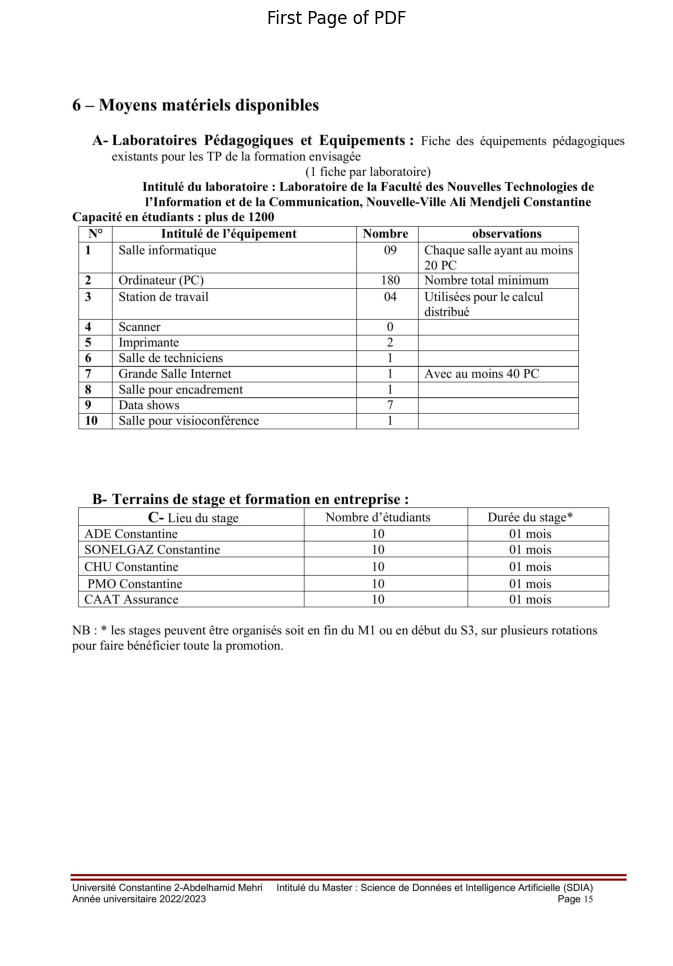

In [3]:
# === Preview First Page ===

first_image = Image.open(image_paths[0])
plt.figure(figsize=(10, 12))
plt.imshow(first_image)
plt.axis("off")
plt.title("First Page of PDF")
plt.show()


# Preprocessing + OCR + Live Preview

In [4]:
# === Section 3: Run structured pipeline ===
content_blocks = ocr.run_pipeline()
print(f"✅ Extracted {len(content_blocks)} content blocks.")



📄 Processing page 1/2
📐 Detected 2 table(s)

📄 Processing page 2/2
📐 Detected 2 table(s)
✅ Extracted 24 content blocks.


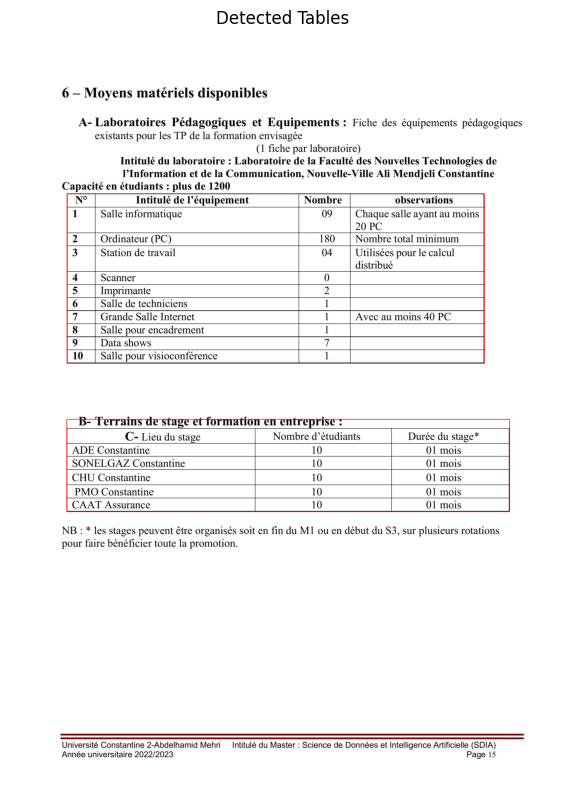

In [5]:
img = cv2.imread(image_paths[0])
pre = ocr.preprocess_image(image_paths[0])
tables = ocr.detect_tables(pre)

for (x1, y1, x2, y2) in tables:
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Detected Tables")
plt.axis("off")
plt.show()


In [6]:
print(f"🔍 Total blocks extracted: {len(content_blocks)}")
for i, block in enumerate(content_blocks[:5]):
    print(f"{i+1}. Page: {block.get('page')} | Type: {block.get('type')} | Sample: {str(block.get('content'))[:100]}")


🔍 Total blocks extracted: 24
1. Page: 1 | Type: text | Sample: 6 — Moyens matériels disponibles
2. Page: 1 | Type: text | Sample: A- Laboratoires Pédagogiques et Equipements : Fiche des équipements pédagogiques
3. Page: 1 | Type: text | Sample: existants pour les TP de la formation envisagée
4. Page: 1 | Type: text | Sample: (1 fiche par laboratoire)
5. Page: 1 | Type: text | Sample: Intitulé du laboratoire : Laboratoire de la Faculté des Nouvelles Technologies de


In [9]:
# === Section 4: Export to text file ===
text_output_path = os.path.join(OUTPUT_DIR, "extracted_content.txt")
ocr.export_to_txt(content_blocks, text_output_path)


# continue

In [ ]:
# # === Section 4: Export to PDF ===
# output_pdf = os.path.join(OUTPUT_DIR, "reconstructed_output.pdf")
# ocr.export_structured_to_pdf(content_blocks, output_pdf)

# print(f"✅ PDF saved to: {output_pdf}")
